# Loan Approval Prediction 

In [1]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [2]:
#  Load Data
data=pd.read_excel('modeldata.xlsx')

In [3]:
data=data.dropna()

In [4]:
X= data.drop(['Action Taken',"Approva1"], axis=1)
y=data["Approva1"]

In [5]:
y.value_counts()

1    1553
0     225
Name: Approva1, dtype: int64

### Model One: Logistic Regression  Model

In [6]:


# Assuming you have your data in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of Logistic Regression classifier with increased max_iter and a different solver
classifier = LogisticRegression(max_iter=1000, solver='sag')

# Fit the model on the scaled training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)
# y_pred = classifier.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Print the predicted values
print(cm_df)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

                 Predicted Negative  Predicted Positive
Actual Negative                  17                  20
Actual Positive                  11                 308
Accuracy: 0.9129213483146067


### Model Two Decision Tree Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a decision tree classifier with pruning
clf = DecisionTreeClassifier(ccp_alpha=0.01)  # Adjust the ccp_alpha parameter to control pruning strength

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)


Accuracy: 0.9269662921348315
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  20                  17
Actual Positive                   9                 310


In [8]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    model=model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
graph_data=pd.DataFrame({"max_depth":range(1,10),"Train_acc":train_accuracy,"test_acc":test_accuracy})

Text(0, 0.5, 'Performance')

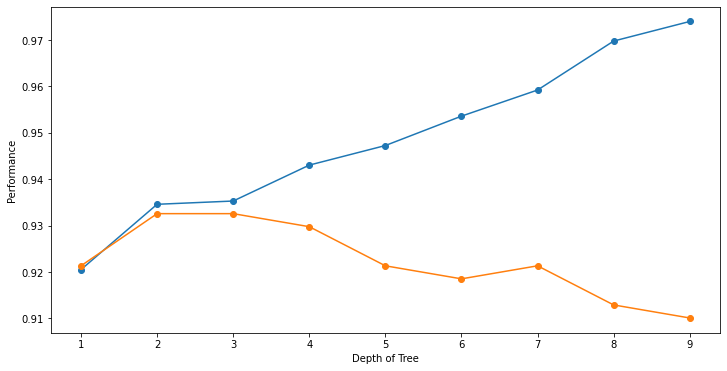

In [9]:
plt.figure(figsize=(12,6))
plt.plot(graph_data['max_depth'],graph_data['Train_acc'],marker="o")
plt.plot(graph_data['max_depth'],graph_data['test_acc'],marker="o")
plt.xlabel("Depth of Tree")
plt.ylabel("Performance")
# plt.legend()


### Model Threes: XG Boost Model

In [10]:
import xgboost as xgb
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)


In [11]:
param={
    "max_depth":10,
    "eta":0.3,
    "num_class":2,
    "objective":"multi:softmax"
}
num_boost_round = 100

In [12]:
xgbmodel=xgb.train(param,train,num_boost_round=num_boost_round)
predict=xgbmodel.predict(test)
accuracy_score(y_test,predict)
cm = confusion_matrix(y_test, predict)
cm_df = pd.DataFrame(cm, index=['Actual Rejected', 'Actual Approved'], columns=['Predicted Rejection', 'Predicted Approved'])
print("Confusion Matrix:")
print(cm_df)
accuracy_score(y_test,predict)

Confusion Matrix:
                 Predicted Rejection  Predicted Approved
Actual Rejected                   20                  17
Actual Approved                    6                 313


0.9353932584269663

In [13]:
print(predict)

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.